# 🧠📱 Screen Time & Mental Health Prediction

## 🔍 Algorithms Used
- 🌲 **Random Forest Classifier**
- ➗ **Logistic Regression**

## 🔑 Keywords
`Screen Time`, `Mental Health`, `Random Forest`, `Logistic Regression`, `Anxiety`, `Stress`, `Classification`, `Model Evaluation`, `Decision Boundary`

## 📊 Tasks Performed
- Preprocessing (handling missing values, encoding)
- Model Training & Testing
- Accuracy & Classification Report
- 📉 Plotted Decision Boundaries
- ➗ Regression Line for Logistic Regression



## 1. import Necessary Libraries

In [78]:
import numpy as np
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [76]:
df = pd.read_csv("/kaggle/input/digital-habits/digital_habits_vs_mental_health.csv")

In [41]:
df

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10
...,...,...,...,...,...,...
99995,5.0,4,1.8,4.5,10,9
99996,6.4,3,3.1,5.4,10,5
99997,3.7,3,1.5,8.3,4,10
99998,10.6,2,5.3,7.2,9,9


## 3. Information about the Dataset

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB


## 4. Group the Target Varible 

In [43]:
def label_mood(score):
    if score <= 4:
        return 'Low'
    elif score <= 7:
        return 'Medium'
    else:
        return 'High'

df['mood_score'] = df['mood_score'].apply(label_mood)


In [44]:
df

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,Medium
1,6.5,5,3.5,6.2,8,High
2,9.1,4,2.8,6.6,7,High
3,6.5,3,2.5,6.5,7,High
4,2.1,3,1.2,7.8,2,High
...,...,...,...,...,...,...
99995,5.0,4,1.8,4.5,10,High
99996,6.4,3,3.1,5.4,10,Medium
99997,3.7,3,1.5,8.3,4,High
99998,10.6,2,5.3,7.2,9,High


In [45]:
df['mood_score'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [46]:
df.sample(10)

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
70991,5.9,5,2.0,6.4,5,High
64103,8.1,2,3.6,7.5,7,High
78360,4.6,5,1.3,5.8,5,High
86174,6.8,3,3.2,4.7,7,Medium
65992,10.0,3,2.6,5.5,7,High
24137,6.4,4,2.1,6.7,9,Medium
48093,6.8,4,1.6,6.8,7,High
4736,5.2,5,1.4,5.9,7,High
67234,4.5,2,1.5,10.0,4,High
65570,3.8,5,1.4,5.9,6,High


## 5. EDA(Exploratory Data Analysis

### Distribution among the columns 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


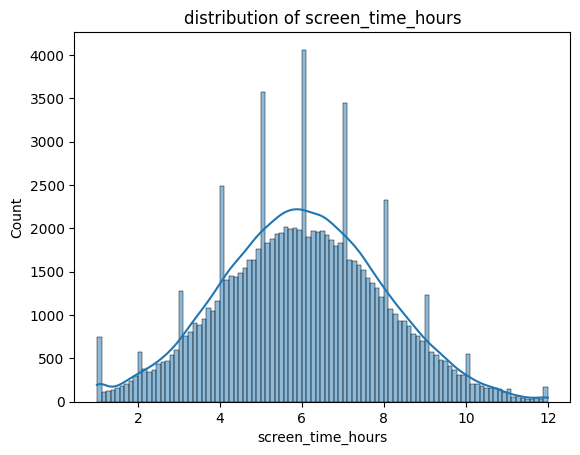

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


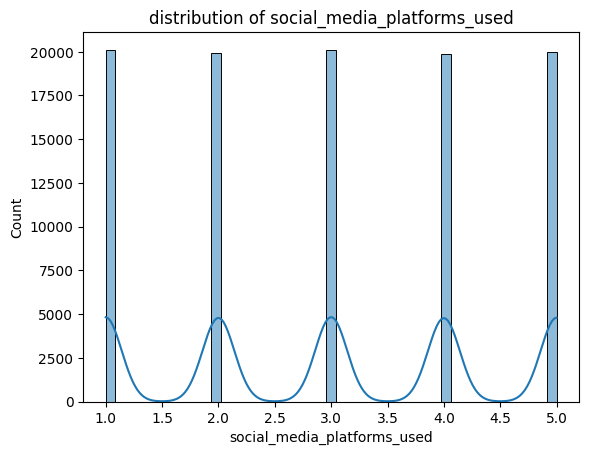

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


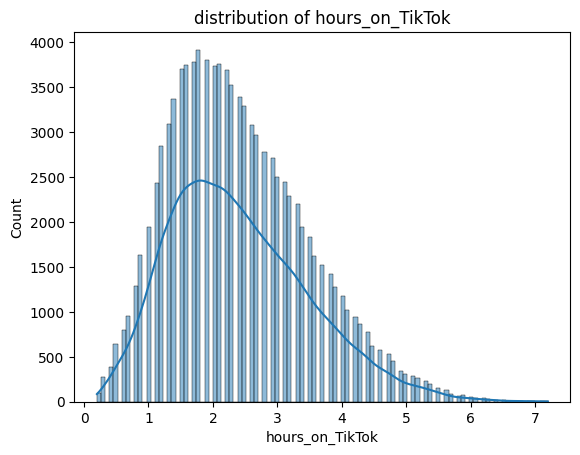

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


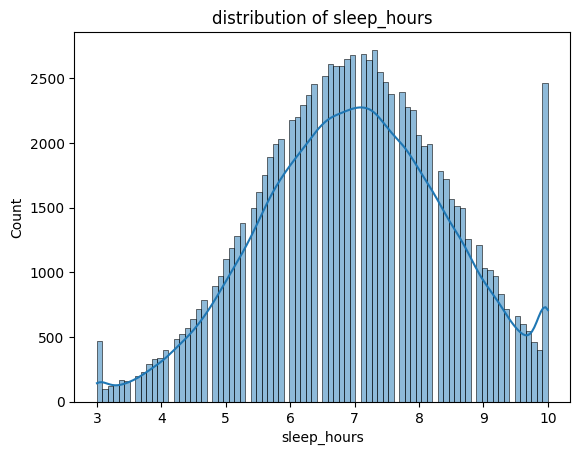

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


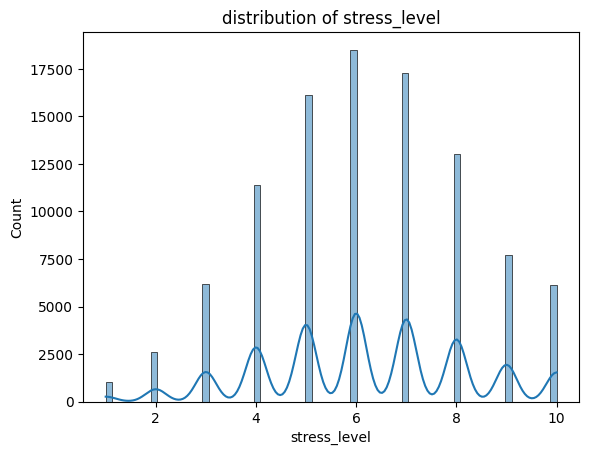

In [47]:
df_numeric = df.select_dtypes(include = 'number')
for col in df_numeric:
    sns.histplot(df[col],kde = True)
    plt.title(f'distribution of {col}')
    plt.show()

### Correlation among the columns

In [48]:
corr_matrix = df_numeric.corr()  # Only numeric columns

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


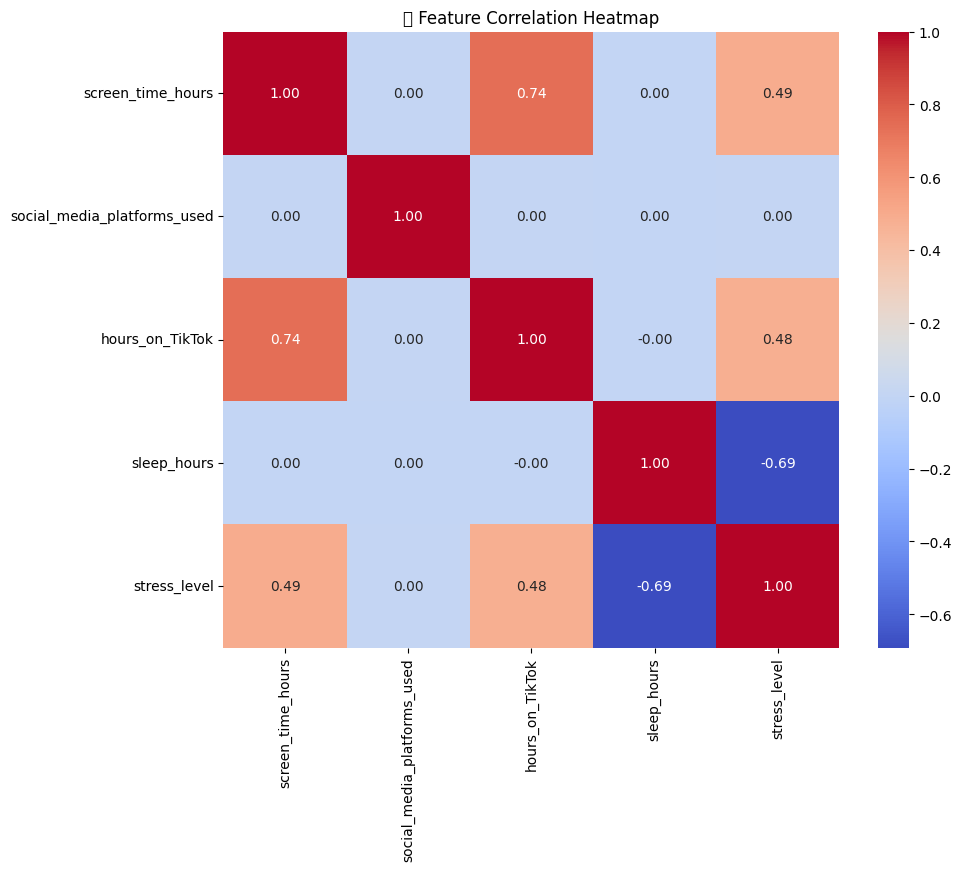

In [49]:
plt.figure(figsize=(10, 8))  # You can adjust the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("🔍 Feature Correlation Heatmap")
plt.show()

## 6. Import Necessary Algorithms 

In [50]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 4.6+ MB


## 7. Separate the dependent and independent Variable 

In [52]:
X = df.iloc[:,0:6]
y = df.iloc[:,-1]

In [53]:
lb = LabelEncoder()
encoded_y = lb.fit_transform(y)

In [54]:
encoded_y

array([2, 0, 0, ..., 0, 0, 0])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 4.6+ MB


## Scaling the numerical value 

In [56]:
numeric_cols = ['screen_time_hours','social_media_platforms_used','hours_on_TikTok',
               'sleep_hours','stress_level']

In [57]:
scaler = StandardScaler()

In [58]:
preprocessor = ColumnTransformer(
    transformers = [
        ('scaler',scaler,numeric_cols)
    
])

In [59]:
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=10)
lr = LogisticRegression()

## 8. Using the Pipeline for fit the model 

In [60]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('rf',rf)
])

In [61]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['screen_time_hours',
                                                   'social_media_platforms_used',
                                                   'hours_on_TikTok',
                                                   'sleep_hours',
                                                   'stress_level'])])),
                ('rf', RandomForestClassifier(max_depth=10))])

## 9. Check Accuracy using the cross val score

In [66]:
scores = cross_val_score(pipeline, X,encoded_y, cv=5, scoring='accuracy')


In [67]:
print("Cross-validation accuracies for each fold:", scores)
print("Average cross-validation accuracy:", np.mean(scores))

Cross-validation accuracies for each fold: [0.9051  0.9122  0.91015 0.90875 0.9084 ]
Average cross-validation accuracy: 0.90892


In [79]:
from sklearn.decomposition import PCA

## 10. Check the Accuracy for Logistic Regression

In [71]:
pipeline2 = Pipeline([
    ('preprocessor',preprocessor),
    ('lr',lr)
])

In [72]:
pipeline2.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['screen_time_hours',
                                                   'social_media_platforms_used',
                                                   'hours_on_TikTok',
                                                   'sleep_hours',
                                                   'stress_level'])])),
                ('lr', LogisticRegression())])

In [73]:
scores = cross_val_score(pipeline2, X,encoded_y, cv=5, scoring='accuracy')

In [74]:
print("Cross-validation accuracies for each fold:", scores)
print("Average cross-validation accuracy:", np.mean(scores))

Cross-validation accuracies for each fold: [0.90715 0.91385 0.91125 0.9096  0.9094 ]
Average cross-validation accuracy: 0.9102499999999999
